In [1]:
import numpy as np
import matplotlib.pyplot as plt


#import pandas as pd      #Package for handling large data structures
#import geopandas as gpd  #Package for handling geospatial data
#from shapely import wkt  #The geo_data is in wkt-format, this package is needed to "read" that (wtk - well known text)


Acceleration function
 
Assumptions:
- Power of the cyclist is constant (50 - 100W)
- Acceleration will not exceed a certain vaule (here 2m/s²)
 
%% Parameters =============================================
P = 100; [W]
m = 100; [kg]
                                                    % Note: there are heavy and light bikes with and w/o luggage, both in the slow and in the fast
                                                    % segment. Is this the correct way?
 
g = 9.81; % [m/s²]
RRcoef = 0.08; % [1]  % Rolling Resistance coefficient
cw = 1;    % [1]   %
A = 0.5;   % [m^2] % frontal area bike and cyclist
 
% Air density
temp = 20; % [degree]
Temp = 273.15 + temp;
rho = rho_T308 + [(Temp - 308.15)*(rho_T248 - rho_T308)/(248.15 - 308.15)];
%rho = 1.2;  % [kg/m^3]  Density air (Note: temperature dependent!)
rho = 10^(-5)*Temp^2 - 0.0048*Temp + 1.2926; 
 
%% Calculation =============================================
% calculate acceleration based on free power
                          ax(i) = P_acc / (m * vx(i));           % P_acc = ax * m * vx
 
% free power left for acceleration
                          P_acc = P - (P_roll_steady + P_air_steady + P_climb_steady);
 
% Rolling resistance power              
                          P_roll_steady = m * g * RRcoef * vx(i);
% Air resistance power
                          P_air_steady = 0.5 * cw * A * rho * vx(i)^3;
% Climbing power
                          P_climb_steady = 0; % no climb
 
% So: function
                          ax(i) = (P - m * g * RRcoef * vx(i) - 0.5 * cw * A * rho * vx(i)^3) / (m * vx(i));
% and
                          ax(i) < 2;
 
%% Figure(?) =============================================


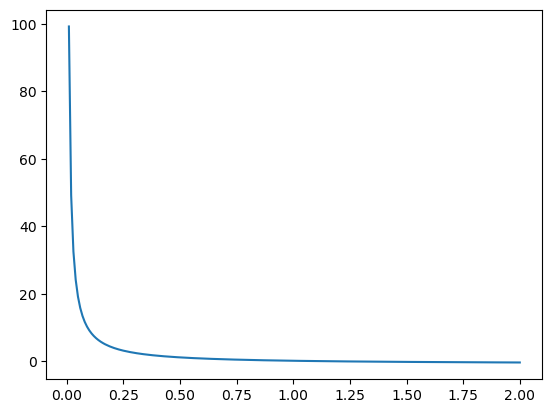

In [4]:
P = 100 # [W]
m = 100 # [kg]

g = 9.81 # [m/s²]
RRcoef = 0.08 # [1]  % Rolling Resistance coefficient
cw = 1 # [1]  
A = 0.5 # [m^2] % frontal area bike and cyclist
 
# Air density
temp = 20 # [degree]
Temp = 273.15 + temp
#rho = rho_T308 + [(Temp - 308.15)*(rho_T248 - rho_T308)/(248.15 - 308.15)];
#rho = 1.2 # [kg/m^3]  Density air (Note: temperature dependent!)
rho = (10**(-5))*(Temp**2) - 0.0048*Temp + 1.2926



#given v
#acc(v) = P_acc(v)/(m*v)
#P_acc(v) = P - (P_roll_steady(v) + P_air_steady(v) + P_climb_steady(v))




def acc_fun(v):
    P_roll_steady = m * g * RRcoef * v
    P_air_steady = 0.5 * cw * A * rho * (v**3)
    P_climb_steady = 0
    P_lost = P_roll_steady + P_air_steady + P_climb_steady
    
    P_acc = P - P_lost
    
    acc = P_acc/(m*v)
    
    return acc



vel = []
for i in range(1,201):
    vel.append(i/100)


acc = []
for v in vel:
    acc.append(acc_fun(v))


plt.plot(vel,acc)

Alterative acceleration
We are interested in maximum acceleration at each velocity
This is given by maximum power output possible for cyclist,
together with air-resistance, rolling resistance, climbing resistiance  - which all are a function of current velocity


Assumptions:
- Acceleration will not exceed a certain vaule (here 2m/s²)


Energy output (from wikipedia)
Active humans can produce 
- 1.5 Watts per kilogram of body mass (untrained),
- 3.0 W/kg (fit), and 
- 6.6 W/kg (top-class male athletes). 
- 5.0 W/kg is about the level reachable by the highest tier of male amateurs for longer periods.[7] 
Maximum sustained power levels during one hour range from about 200 W (NASA experimental group of "healthy men") to 500 W (men's world hour record).[8]


Rolling resistance (from wikipedia)
0.0022 to 0.0050[27] 		Production bicycle tires at 120 psi (8.3 bar) and 50 km/h (31 mph), measured on rollers

In [41]:
E_output = {"untrained": 1.5, "fit": 3.0, "highP": 5.0} #[W/kg]

m_bike = 10 #[kg] mass of bike
m = 90 #mass of cyclist
level = "fit" #Key for dict: E_output [W/kg]; Poss keys: "untrained", "fit", "highP"

P_max = m*E_output[level] #[W]


g = 9.81 # [m/s²]
RRcoef = 0.008 # [1]  % Rolling Resistance coefficient
cw = 1 # [1]  
A = 0.5 # [m^2] % frontal area bike and cyclist
 
# Air density
temp = 20 # [degree]
Temp = 273.15 + temp
#rho = rho_T308 + [(Temp - 308.15)*(rho_T248 - rho_T308)/(248.15 - 308.15)];
#rho = 1.2 # [kg/m^3]  Density air (Note: temperature dependent!)
rho = (10**(-5))*(Temp**2) - 0.0048*Temp + 1.2926
s = 0 #[rad] degree of slope


#given v
#acc(v) = P_acc(v)/(m*v)
#P_acc(v) = P - (P_roll_steady(v) + P_air_steady(v) + P_climb_steady(v))




def acc_fun(v):
    if v == 0:
        acc = 100
    else: 
        P_roll_steady = (m+m_bike) * g * RRcoef * v
        P_air_steady = 0.5 * cw * A * rho * (v**3)
        P_climb_steady = (m+m_bike)*g*s
        P_lost = P_roll_steady + P_air_steady + P_climb_steady

        P_acc = P_max - P_lost
        acc = P_acc/(m*v)

    acc = min(2, acc)
    acc = max(acc,0)
    
    return acc


vel = []
for i in range(0,151):
    vel.append(i/10)

dt = 2 #[s]



v_poss = []
acc_list = []
for v in vel:
    a = acc_fun(v)
    v_poss.append(v+a*dt)
    acc_list.append(a)
    

#print(v_poss)
induced_sets = []
old_max = 1000000

for j in range(len(vel)):
    k = len(vel) - j -1

    uSet = []
    for i in range(len(vel)):
        if vel[i] <= v_poss[k]:
            if i <= old_max:
                uSet.append(i)
        
    induced_sets.append(uSet)
    old_max = uSet[-1]
    
induced_sets.reverse()

#u_poss = []
#for u in vel:
#    u_poss.append(u+acc_fun(u)*dt)

#induced_sets = []
#leee = 0

#for v in vel:
#    uSet = []
#    for i in range(len(vel)):
#        if u_poss[i] >= v:
#            uSet.append(i)
#    induced_sets.append(uSet)


In [40]:
#for i in range(len(induced_sets)):
#    print(induced_sets[i][-1], i)
    
    
for i in range(len(induced_sets)):
    if induced_sets[i][-1] <= i:
        del induced_sets[i]
        del vel[i]
        #del H[i]
        

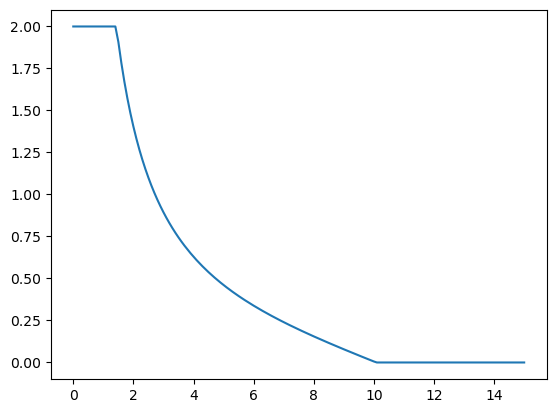

In [42]:
plt.plot(vel,acc_list)